In [21]:
import dbnomics
from matplotlib import pyplot as plt
plt.style.use('ggplot')
plt.rcParams['axes.facecolor']='w'
plt.rcParams.update({"axes.grid" : True, "grid.color": "grey"})
import pandas as pd
import numpy as np



In [22]:
ls gid-excel-2018

gid-codebook.txt  gid-previewexcel.csv  __MACOSX/


In [23]:
import pandas as pd

In [24]:
filename ="gid-excel-2018/gid-previewexcel.csv"

In [25]:
df = pd.read_csv(filename, engine="python")

In [26]:
import altair as alt

In [27]:
df.columns

Index(['country', 'coun3', 'year', 'atkinson2', 'gini', 'm2mratio',
       'palmaratio', 'income1', 'income2', 'income3', 'income4', 'income5',
       'income6', 'income7', 'income8', 'income9', 'income10', 'incomeatperc1',
       'incomeatperc10', 'incomeatperc20', 'incomeatperc30', 'incomeatperc40',
       'incomeatperc50', 'incomeatperc60', 'incomeatperc70', 'incomeatperc80',
       'incomeatperc90', 'incomeatperc95', 'incomeatperc99', 'incomeatperc100',
       'mean', 'mean2011PPP', 'mld', 'ratio90to10levels', 'share1', 'share2',
       'share3', 'share4', 'share5', 'share6', 'share7', 'share8', 'share9',
       'share10', 'growthrate', 'incdefn', 'population', 'databasesource',
       'sharetop1', 'sharetop5', 'source1', 'sqcoeffvariation',
       'surveysource2', 'surveyyears', 'consumptionsurvey', 'theil'],
      dtype='object')

In [93]:
def get_value(country, year, name):
    dd = df[(df['country']==country) & (df['year']==(year))]
    return float(dd[name])



In [94]:
def get_gini(country, year):
    dd = df[(df['country']==country) & (df['year']==(year))]
    return float(dd["gini"])


In [52]:
def get_series(country, year):
    dd = df[(df['country']==country) & (df['year']==(year))]
    avg_inc = float(dd['mean2011PPP'])
    shares = [float(dd[f"share{i}"]) for i in range(1,11)]
    income = [avg_inc*float(e)*10 for e in shares]
    return shares, income
    

In [53]:
qts = [0.1*i for i in range(1,11)]

In [54]:
get_series("France", 2011)[1]

[510.4986655176001,
 727.3399498380002,
 905.8840429176001,
 1068.2271030276002,
 1228.3058492892,
 1399.0707211716003,
 1598.4519968700001,
 1862.1965167956002,
 2298.2995205244,
 4283.845316406]

In [55]:
get_gini("France", 2011)

France


0.33292484

In [31]:
countries = ["France", "China", "United States", "United Kingdom", "Brazil"]
income_per_quantile = {c: get_series(c, 2011)[1] for c in countries}
share_per_quantile = {c: get_series(c, 2011)[0] for c in countries}

# Source Core Econ

France
China
United States
United Kingdom
Brazil
France
China
United States
United Kingdom
Brazil


In [32]:
quantiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7 , 0.8,  0.9, 1.0]


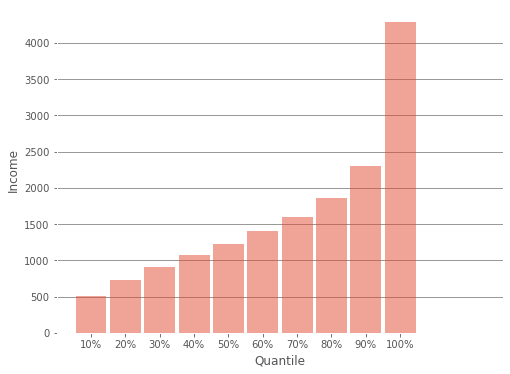

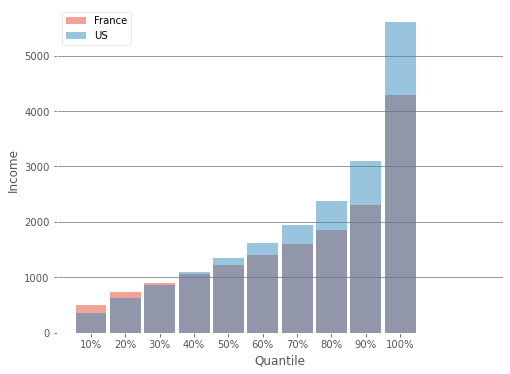

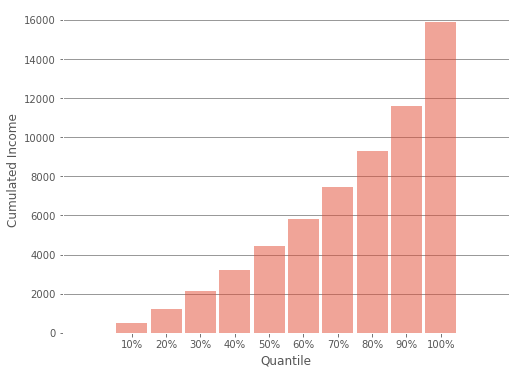

In [33]:
inc = np.array(income_per_quantile['France'])
cs = inc.cumsum()

inc_US = np.array(income_per_quantile['United States'])
# cs_US = inc.cumsum()

fig = plt.figure(figsize=(8, 6))
plt.bar([e-0.1 for e in quantiles], inc, width=0.09, align='center', tick_label=[f'{e*100:.0f}%' for e in quantiles], alpha=0.5)
plt.ylim(0)
plt.xlim(-0.1,1.2)
plt.grid( axis='x')
plt.xlabel("Quantile")
plt.ylabel("Income")
plt.savefig("income_inequality_1.png")
display(fig)


fig = plt.figure(figsize=(8, 6))
plt.bar([e-0.1 for e in quantiles], inc, width=0.09, align='center', tick_label=[f'{e*100:.0f}%' for e in quantiles], alpha=0.5, label='France')
plt.bar([e-0.1 for e in quantiles], inc_US, width=0.09, align='center', tick_label=[f'{e*100:.0f}%' for e in quantiles], alpha=0.5, label= 'US')
plt.ylim(0)
plt.xlim(-0.1,1.2)
plt.grid( axis='x')
plt.xlabel("Quantile")
plt.ylabel("Income")
plt.legend(loc='upper left')
plt.savefig("income_inequality_1_comparison.png")
display(fig)




fig = plt.figure(figsize=(8, 6))
plt.bar([e-0. for e in quantiles], cs, width=0.09, align='center', tick_label=[f'{e*100:.0f}%' for e in quantiles], alpha=0.5)
plt.ylim(0)
plt.xlim(-0.1,1.2)
plt.grid( axis='x')
plt.xlabel("Quantile")
plt.ylabel("Cumulated Income")
plt.savefig("income_inequality_2.png")
display(fig)

## inequality measure : top 10% over bottom 10%

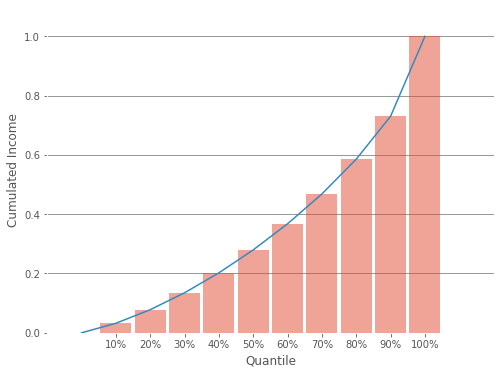

In [39]:

sh = cs/cs[-1]
fig3 = plt.figure(figsize=(8, 6))
plt.bar([e for e in quantiles],(cs/cs[-1]).tolist(), width=0.09, align='center', tick_label=[f'{e*100:.0f}%' for e in quantiles], alpha=0.5)
plt.plot([0.0]+quantiles,  [0.0]+ (cs/cs[-1]).tolist(), color='C1')
plt.ylim(0, 1.1)
plt.xlim(-0.1,1.2)
plt.grid( axis='x')
plt.xlabel("Quantile")
plt.ylabel("Cumulated Income")
plt.savefig("income_inequality_3.png")
fig3

# we can read the 10% poorest have 3.1%
# while the 10% richest earn 25%
# inequality measure: top10% over top20% = 

Gini:  -6.757369935147398
it should be 0.33


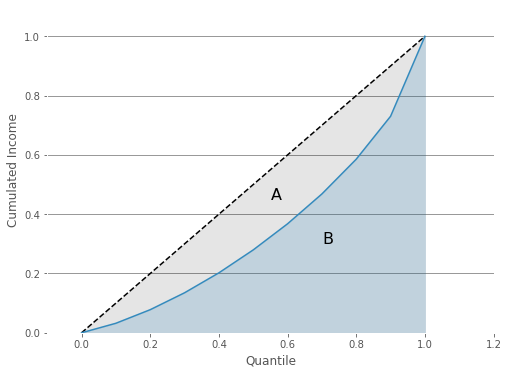

In [131]:
sh = cs/cs[-1]
fig3 = plt.figure(figsize=(8, 6))
# plt.bar([e for e in quantiles],(cs/cs[-1]).tolist(), width=0.09, align='center', tick_label=[f'{e*100:.0f}%' for e in quantiles], alpha=0.5)
plt.plot([0.0]+quantiles,  [0.0]+quantiles, color='black', linestyle='--')
plt.fill_between([0.0]+quantiles,  [e*0 for e in ([0.0]+quantiles)], [0.0]+quantiles, color='black', alpha=0.1)
plt.plot([0.0]+quantiles,  [0.0]+ (cs/cs[-1]).tolist(), color='C1')
plt.fill_between([0.0]+quantiles,  [e*0 for e in ([0.0]+quantiles)], [0.0]+ (cs/cs[-1]).tolist(), color='C1', alpha=0.2)

plt.ylim(0, 1.1)
plt.xlim(-0.1,1.2)
plt.grid( axis='x')
plt.xlabel("Quantile")
plt.ylabel("Cumulated Income")
plt.savefig("gini.png")
plt.text(0.55, 0.45, "A", fontdict={"size": 16})
plt.text(0.7, 0.3, "B", fontdict={"size": 16})
B = sum( [0.0]+ (cs/cs[-1]).tolist() )/1
print('Gini: ', (1-2*B ))
print("it should be 0.33")
fig3



In [57]:
income_per_quantile

{'France': [510.4986655176001,
  727.3399498380002,
  905.8840429176001,
  1068.2271030276002,
  1228.3058492892,
  1399.0707211716003,
  1598.4519968700001,
  1862.1965167956002,
  2298.2995205244,
  4283.845316406],
 'China': [45.92616406559999,
  95.07738346080001,
  147.76284945240002,
  206.01037747679996,
  272.8685765208,
  353.4260517216,
  457.32411165480005,
  606.4540846728,
  869.3027064227999,
  1917.5676945516],
 'United States': [350.7690341904,
  619.9808561568001,
  864.7120830168001,
  1102.2915414408,
  1347.5906722512002,
  1618.1163159816003,
  1941.5423451144002,
  2375.6458925328006,
  3093.4462178064005,
  5603.425230684001],
 'United Kingdom': [406.6649287554,
  620.1000463248,
  800.425416867,
  966.9183441114001,
  1132.6065687429,
  1310.1921632253002,
  1517.6133321312,
  1790.3849683071003,
  2232.0367535079,
  3677.9274780270002],
 'Brazil': [57.832885405439995,
  116.12704198464,
  164.25351435455997,
  213.53656694976,
  268.78778410175994,
  335.477801

<Figure size 432x288 with 0 Axes>

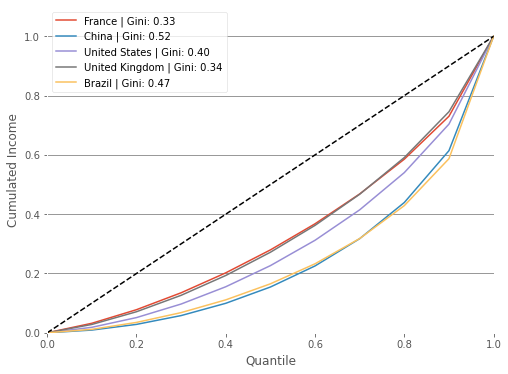

In [130]:
plt.clf()
fig3 = plt.figure(figsize=(8, 6))
for c in countries:
    sh = np.array(share_per_quantile[c]).cumsum()
    gini = get_gini(c, 2011)
    plt.plot([0.0]+quantiles,  [0.0]+ sh.tolist(), label=f"{c} | Gini: {gini:.2f}")

# plt.bar([e for e in quantiles],(cs/cs[-1]).tolist(), width=0.09, align='center', tick_label=[f'{e*100:.0f}%' for e in quantiles], alpha=0.5)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

plt.ylim(0, 1.1)
plt.xlim(-0.,1.)
plt.grid( axis='x')
plt.xlabel("Quantile")
plt.ylabel("Cumulated Income")
plt.legend(loc='upper left')
plt.savefig("income_inequality_comparison.png", transparent=True, bbox_inches='tight')


In [76]:
sh9 = get_value("France", 2010, "share9")
sh10 = get_value("France", 2010, 'share10')
t5 = get_value("France", 2010, 'sharetop5')
t1 = get_value("France", 2010, 'sharetop1')
# get_value("France", 2010, 'sharetop10')

France
France
France
France


In [77]:
total = sh9 + sh10

In [85]:
x = np.array([0.0, 10, 15, 19, 20])/20
y = np.array([0.0, sh9/total, (sh10-t5)/total, (t5-t1)/total, t1/total])
c = y.cumsum()

('transparent=True,', "bbox_inches='tight')")

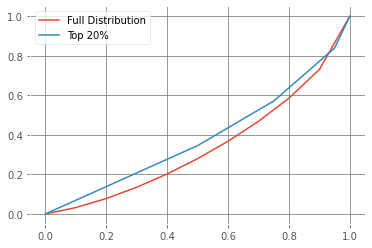

In [126]:
sh = np.array(share_per_quantile["France"]).cumsum()
plt.plot([0.0]+quantiles,  [0.0]+ sh.tolist(), label=f"Full Distribution")
plt.plot(x,c, label="Top 20%")
plt.legend(loc='upper left')


In [96]:
def get_all_gini(country):
    dates = []
    indices = []
    for year in range(1900, 2020):
        try:
            gin = get_gini(country, year)
            dates.append(year)
            indices.append(gin)
        except:
            pass
    return dates, indices

In [102]:
dates0, indices0 = get_all_gini("France")
dates1, indices1 = get_all_gini("United States")

(1970.0, 2017.75)

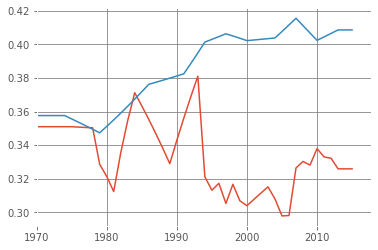

In [104]:
plt.plot(dates0, indices0)
plt.plot(dates1, indices1)
plt.xlim(1970)

INSEE: Gini index

In [135]:
gini_france = [[1970, 0.337],
[1975, 0.323],
[1979, 0.303],
[1984, 0.297],
[1990, 0.283],
[1996, 0.282],
[1997, 0.281],
[1998, 0.279],
[1999, 0.286],
[2000, 0.289],
[2001, 0.288],
[2002, 0.284],
[2003, 0.283],
[2004, 0.283],
[2005, 0.289],
[2006, 0.293],
[2007, 0.292],
[2008, 0.292],
[2009, 0.293],
[2010, 0.302],
[2011, 0.305],
[2012, 0.302],
[2013, 0.288],
[2014, 0.289],
[2015, 0.292],
[2016, 0.288],
[2017, 0.289]]

In [136]:
dates, gini = [*zip(*gini_france)]

In [137]:
ginis_us = [[1974, 35.3],
[1979, 34.6],
[1986, 37.5],
[1991, 38.2],
[1994, 40.2],
[1997, 40.7],
[2000, 40.3],
[2004, 40.5],
[2007, 41.0],
[2010, 40.3],
[2013, 41.0],
[2016, 41.4]]
dates_us, gini_us = [*zip(*ginis_us)]
gini_us  = np.array(gini_us)/100

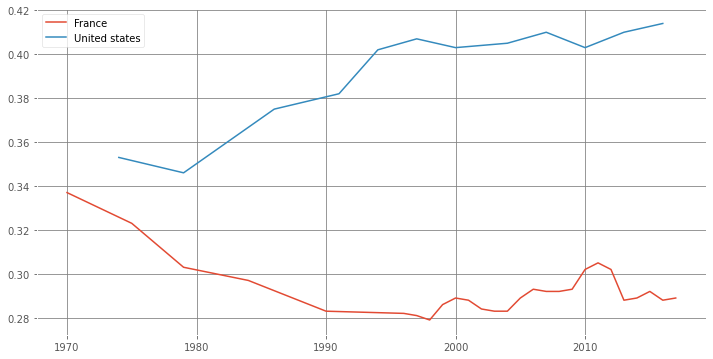

In [138]:
plt.figure(figsize=(12, 6))
plt.plot(dates, gini, label='France')
plt.plot(dates_us, gini_us, label='United states')
plt.legend(loc='upper left')
plt.savefig("gini_evolution.png", transparent=True, bbox_inches='tight')